# Employee Absenteeism Project :

### To Study the given dataset for employee absenteeism trends, pattern and build the predictive model to predict the absenteeism time

In [242]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer

#setting maximum column to display
pd.set_option('display.max_columns', 90)

In [243]:
os.getcwd()
os.chdir("C:/Users/SAURABH SHRIVASTAVA/OneDrive/Data Scientist/Employee absent for GITHUB")
os.getcwd()

'C:\\Users\\SAURABH SHRIVASTAVA\\OneDrive\\Data Scientist\\Employee absent for GITHUB'

In [244]:
#getting the data
empdf=pd.read_excel("Absenteeism_at_work_Project final.xls")
empdf.head(4)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0


In [245]:
empdf.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [246]:
#Since values cannot be zero, removing them with null value then impute using Missing Value Imputation

empdf["Reason for absence"]=empdf["Reason for absence"].replace(0,np.nan)
empdf["Month of absence"]=empdf["Month of absence"].replace(0,np.nan)
empdf["Absenteeism time in hours"]=empdf["Absenteeism time in hours"].replace(0,np.nan)

In [247]:
#Changing data type
cat_col=['ID',"Reason for absence","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Son","Social drinker","Social smoker","Pet"]
cont_col=['Transportation expense','Distance from Residence to Work',"Service time",'Age','Work load Average/day ','Hit target','Weight','Height',"Body mass index","Absenteeism time in hours"]

empdf[cat_col]=empdf[cat_col].astype('category')
empdf[cont_col]=empdf[cont_col].astype('float')


## Missing Value Imputation

In [248]:

mvalue=pd.DataFrame(empdf.isna().sum())
mvalue.reset_index()
mvalue = mvalue.rename(columns={0:"missing"})

mvalue["percentage"]=(mvalue["missing"]/len(empdf))*100
mvalue.sort_values("percentage", ascending=False)

,missing,percentage
Absenteeism time in hours,58,7.837838
Reason for absence,46,6.216216
Body mass index,31,4.189189
Height,14,1.891892
Work load Average/day,10,1.351351
Education,10,1.351351
Transportation expense,7,0.945946
Son,6,0.810811
Disciplinary failure,6,0.810811
Hit target,6,0.810811


### Function for missing value imputation

In [249]:
def impute(col):
    if col=="Weight": #impute using BMI Formula
        if empdf[col].isna().sum()>0: #Checking whether given column has null value, if yes then only process further.
            for i in empdf[empdf[col].isna()].index: #Getting the index of null value in given column
                if str(empdf["Weight"][i])=="nan" and str(empdf["Height"][i])=="nan":
                    temp=empdf["Body mass index"][i]
                    index=empdf[empdf["Body mass index"]==temp].index
                    empdf["Weight"][i]=empdf["Weight"][index].mean()
                if str(empdf["Weight"][i])=="nan" and str(empdf["Body mass index"][i])=="nan":
                    temp=empdf["Height"][i]
                    index=empdf[empdf["Height"]==temp].index
                    empdf["Weight"][i]=empdf["Weight"][index].mean()
                else:
                    empdf["Weight"][i]=empdf["Body mass index"][118]*(((empdf["Height"][118])/100)**2) #Using BMI Formula
                    
    if col=="Height":#impute using BMI Formula
        if empdf[col].isna().sum()>0: #Checking whether given column has null value, if yes then only process further.
            for i in empdf[empdf[col].isna()].index: #Getting the index of null value in given column
                if str(empdf["Height"][i])=="nan" and str(empdf["Weight"][i])=="nan":
                    temp=empdf["Body mass index"][i]
                    index=empdf[empdf["Body mass index"]==temp].index
                    empdf["Height"][i]=empdf["Height"][index].mean()
                if str(empdf["Height"][i])=="nan" and str(empdf["Body mass index"][i])=="nan":
                    temp=empdf["Weight"][i]
                    index=empdf[empdf["Weight"]==temp].index
                    empdf["Height"][i]=empdf["Height"][index].mean()
                else:
                    empdf.Height[i]=((math.sqrt(empdf["Weight"][i]/empdf["Body mass index"][i]))*100)#Using BMI Formula

    if col=="Body mass index": #impute using BMI Formula
        if empdf[col].isna().sum()>0: #Checking whether given column has null value, if yes then only process further.
            for i in empdf[empdf[col].isna()].index: #Getting the index of null value in given column
                if str(empdf["Body mass index"][i])=="nan" and str(empdf["Weight"][i])=="nan":
                    temp=empdf["Height"][i]
                    index=empdf[empdf["Height"]==temp].index
                    empdf["Body mass index"][i]=empdf["Body mass index"][index].mean()
                if str(empdf["Height"][i])=="nan" and str(empdf["Body mass index"][i])=="nan":
                    temp=empdf["Weight"][i]
                    index=empdf[empdf["Weight"]==temp].index
                    empdf["Body mass index"][i]=empdf["Body mass index"][index].mean()
                else:
                    empdf["Body mass index"][i]=empdf.Weight[i]/((empdf.Height[i]/100)**2) #Using BMI Formula


    #Since Hit target and Work load Average/day values are same(or almost same) in thier corrosponding location,
    #We will use the corrosponding mean value of missing index of other column to find the missing value of that location.                    
    if col=="Distance from Residence to Work":
        if empdf[col].isna().sum()>0: #Checking whether given column has null value, if yes then only process further.
            for i in empdf[empdf[col].isna()].index: #Getting the index of null value in given column
                if str(empdf[col][i])=="nan" and str(empdf["Transportation expense"][i])=="nan":
                    empdf[col][i]=empdf[col].mode()
                else:
                    temp=empdf["Transportation expense"][i]
                    index=empdf[empdf["Transportation expense"]==temp].index
                    empdf[col][i]=empdf[col][index].mean()
                
    
    #Since Transportation expense and Distance from work values are same(or almost same) in thier corrosponding location,
    #We will use the corrosponding mean value of missing index of other column to find the missing value of that location.
    if col=="Transportation expense":
        if empdf[col].isna().sum()>0: #Checking whether given column has null value, if yes then only process further.
            for i in empdf[empdf[col].isna()].index: #Getting the index of null value in given column
                if str(empdf[col][i])=="nan" and str(empdf["Distance from Residence to Work"][i])=="nan":
                    empdf[col][i]=empdf[col].mode()
                else:
                    temp=empdf["Distance from Residence to Work"][i]
                    index=empdf[empdf["Distance from Residence to Work"]==temp].index
                    empdf[col][i]=empdf[col][index].mean()
    
    if col=="Age":
        empdf["Age"][50] #36
        empdf["Age"][50] =np.nan
        empdf["Age"].mean() #36.44 - Selected mean
        empdf["Age"].median() #37
        empdf["Age"].mode() #28
        empdf["Age"]=empdf["Age"].fillna(round(empdf["Age"].mean()))
    
    if col=="Service time":
        empdf["Service time"][50] #11
        empdf["Service time"][50] = np.NaN 
        empdf["Service time"].mean() #12.56
        empdf["Service time"].median() #13
        empdf["Service time"].mode() #12.56
        empdf["Service time"]=empdf["Service time"].fillna(round(empdf["Service time"].mean()))

    #Since Hit target and Work load Average/day values are same(or almost same) in thier corrosponding location,
    #We will use the corrosponding value of missing index of other column to find the missing value of that location.
    if col=="Hit target":    
        if empdf[col].isna().sum()>0: #Checking whether given column has null value, if yes then only process further.
            for i in empdf[empdf[col].isna()].index: #Getting the index of null value in given column
                if str(empdf[col][i])=="nan" and str(empdf["Work load Average/day "][i])=="nan":
                    empdf[col][i]=empdf[col].mode()
                else:
                    temp=empdf["Work load Average/day "][i]
                    index=empdf[empdf["Work load Average/day "]==temp].index
                    empdf[col][i]=empdf[col][index].mean()
        
    #Since Hit target and Work load Average/day values are same(or almost same) in thier corrosponding location,
    #We will use the corrosponding value of missing index of other column to find the missing value of that location.
    if col=="Work load Average/day ":    
        if empdf[col].isna().sum()>0: #Checking whether given column has null value, if yes then only process further.
            for i in empdf[empdf[col].isna()].index: #Getting the index of null value in given column
                if str(empdf[col][i])=="nan" and str(empdf["Hit target"][i])=="nan":
                    empdf[col][i]=empdf[col].mode()
                else:
                    temp=empdf["Hit target"][i]
                    index=empdf[empdf["Hit target"]==temp].index
                    empdf[col][i]=empdf[col][index].mean()
        
    if col=="Absenteeism time in hours":
        #####Imputing Absenteeism time in hours
        empdf["Absenteeism time in hours"][10] #Actual value=8
        empdf["Absenteeism time in hours"][11] #Actual value=8
        empdf["Absenteeism time in hours"][15] #Actual value=7
        
        empdf["Absenteeism time in hours"][10]=np.nan
        empdf["Absenteeism time in hours"][11]=np.nan
        empdf["Absenteeism time in hours"][15]=np.nan
        
        empdf["Absenteeism time in hours"].mode() #8 Selected Mode-Method for imputation
        empdf["Absenteeism time in hours"].mean() #4.88
        empdf["Absenteeism time in hours"].median() #3
        
        empdf["Absenteeism time in hours"]=empdf["Absenteeism time in hours"].fillna(float(empdf["Absenteeism time in hours"].mode()))
        
    else:
        #####filling categorical variable with their mode value
        empdf["Reason for absence"]=empdf["Reason for absence"].fillna(float(empdf["Reason for absence"].mode()))
        empdf["Son"]=empdf["Son"].fillna(float(empdf["Son"].mode()))
        empdf["Pet"]=empdf["Pet"].fillna(float(empdf["Pet"].mode()))
        empdf["Social drinker"]=empdf["Social drinker"].fillna(float(empdf["Social drinker"].mode()))
        empdf["Social smoker"]=empdf["Social smoker"].fillna(float(empdf["Social smoker"].mode()))
        empdf["Month of absence"]=empdf["Month of absence"].fillna(float(empdf["Month of absence"].mode()))
        empdf["Education"]=empdf["Education"].fillna(float(empdf["Education"].mode()))
        empdf["Disciplinary failure"]=empdf["Disciplinary failure"].fillna(float(empdf["Disciplinary failure"].mode()))


In [250]:
#imputing values
for i in empdf.columns:
    impute(i)

In [251]:
empdf.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

## Graphical plotting of the dataset and studying thier dependency

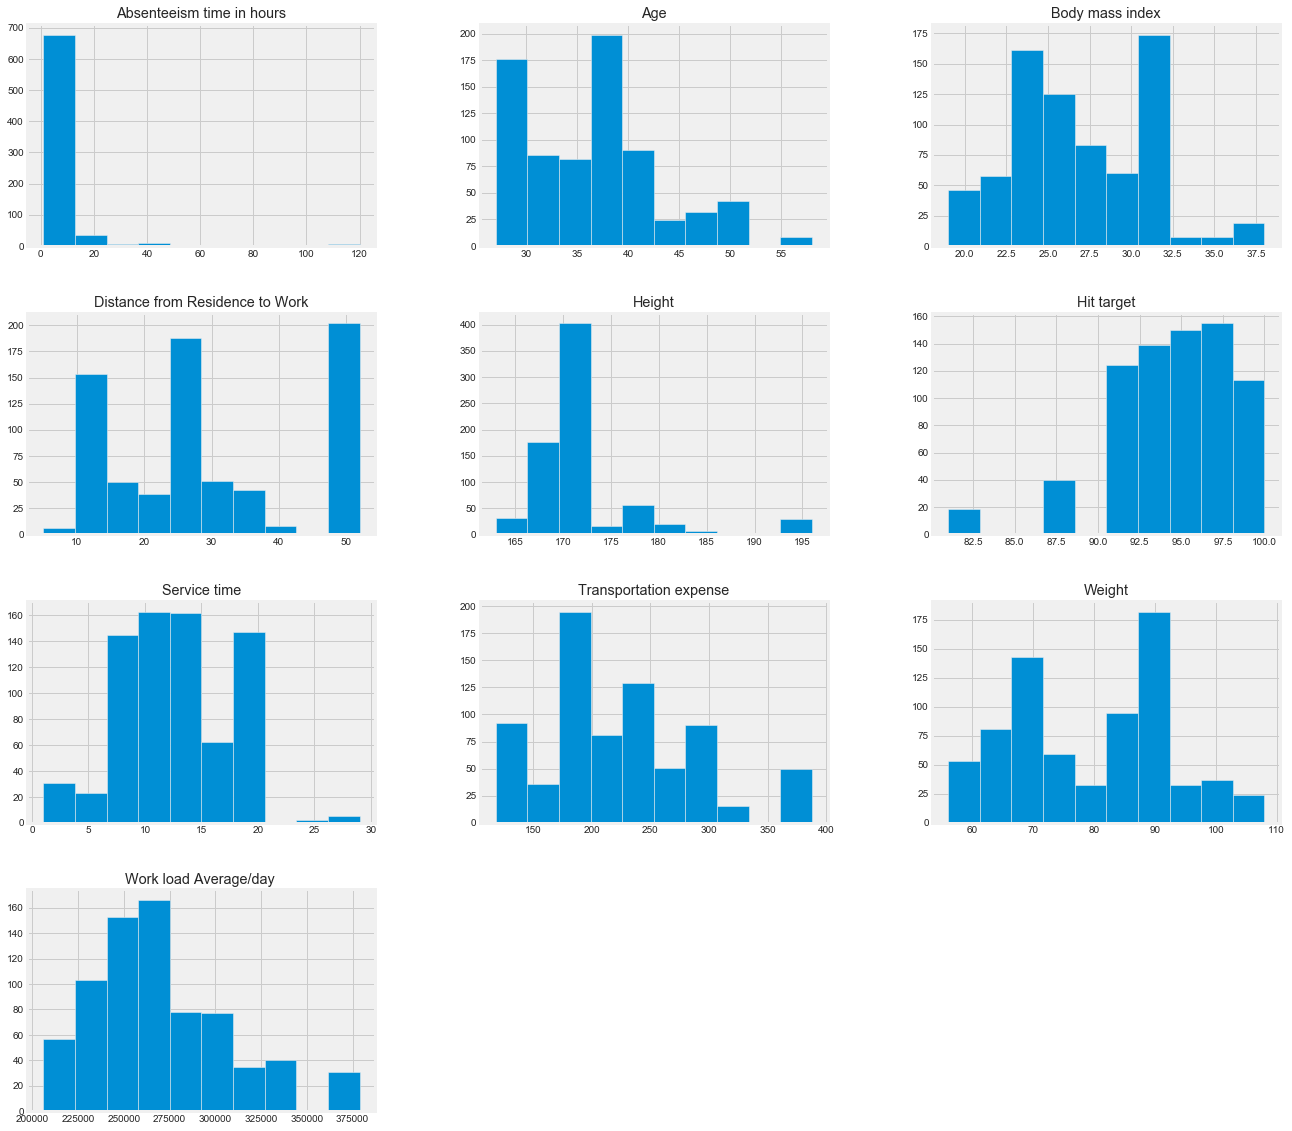

In [252]:
#plotttin data for its analysing thier distribution
empdf.hist(figsize=(20,20))
plt.show()

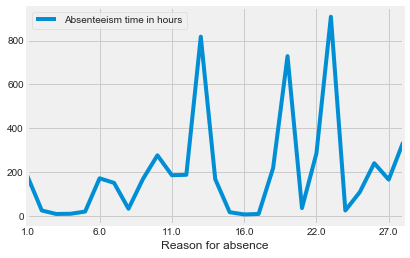

In [253]:
#Studying Absenteeism time w.r.t Reason for absence

absent=empdf.loc[:,("Reason for absence", "Absenteeism time in hours")]
abgrp=absent.groupby('Reason for absence').sum()
abgrp.plot()

#### From above fig, we found absenteeism time is more for absence reason between 11 to 27

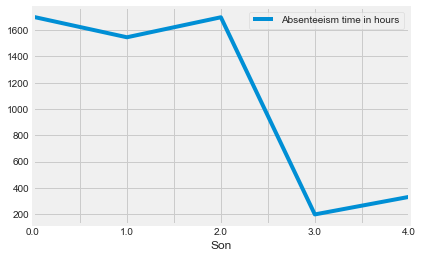

In [254]:
#Studying Absenteeism time w.r.t no. of son

absentSon=empdf.loc[:,("Son", "Absenteeism time in hours")]
absentSongrp=absentSon.groupby('Son').sum()
absentSongrp.plot()

#### Above plot shows that employee with less than 2 Son, are more absent

,Month of absence,Absenteeism time in hours
0,1.0,230.0
1,8.0,288.0
2,2.0,294.0
3,9.0,364.0
4,12.0,390.0
5,10.0,428.0
6,6.0,435.0
7,5.0,448.0
8,4.0,490.0
9,11.0,527.0


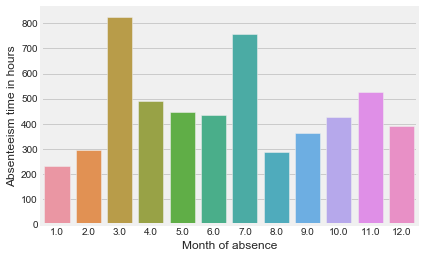

In [255]:
#Plotting Month of absence w.r.t Absenteism time in hours

month=empdf.loc[:,("Month of absence", "Absenteeism time in hours")]
monthgrp=month.groupby('Month of absence').sum().sort_values("Absenteeism time in hours").reset_index()
sns.barplot(x='Month of absence', y='Absenteeism time in hours', data=monthgrp)
monthgrp

#### From above plot, we find that Month 3 and 7, the absenteesim time is more

,Seasons,Absenteeism time in hours
1,1,1295.0
0,2,1176.0
3,3,1604.0
2,4,1399.0


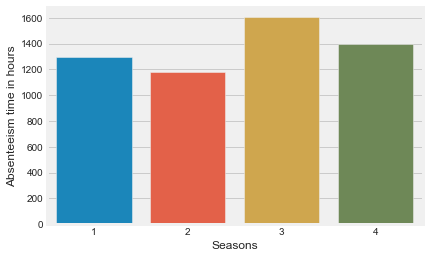

In [256]:
#Plotting Absenteeism w.r.t Seasons

seasons=empdf.loc[:,("Seasons", "Absenteeism time in hours")]
seasonsgrp=seasons.groupby('Seasons').sum().sort_values("Absenteeism time in hours").reset_index()
sns.barplot(x='Seasons', y='Absenteeism time in hours', data=seasonsgrp)
seasonsgrp.sort_values("Seasons", axis = 0, ascending = True)

#### Above plot shows - Season-3 has highest Absenteeism time

,Social drinker,Absenteeism time in hours
0,0.0,2021.0
1,1.0,3453.0


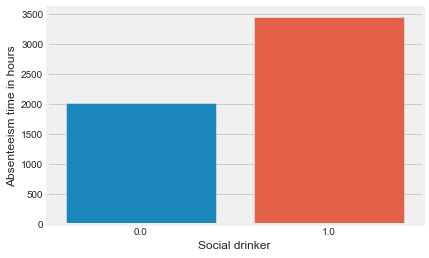

In [257]:
#PLotting Absenteeism time w.r.t Drinking habbit

month=empdf.loc[:,("Social drinker", "Absenteeism time in hours")] #getting the columns for analysis
#grouping them and totaling the absenteeism time
monthgrp=month.groupby('Social drinker').sum().sort_values("Absenteeism time in hours").reset_index()
#plotting the barplot
sns.barplot(x='Social drinker', y='Absenteeism time in hours', data=monthgrp)
monthgrp


#### Above fig shows - Drinker are more absent as compared to non-drinker 

,Social smoker,Absenteeism time in hours
0,1.0,527.0
1,0.0,4947.0


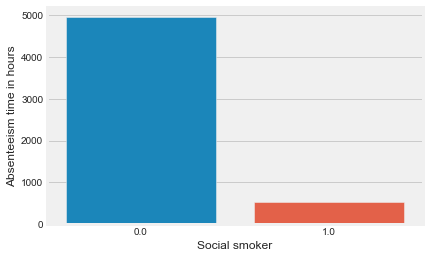

In [258]:
#Plotting Absenteeism w.r.t Smoking habbits

month=empdf.loc[:,("Social smoker", "Absenteeism time in hours")] #getting the columns for analysis
#grouping them and totaling the absenteeism time
monthgrp=month.groupby('Social smoker').sum().sort_values("Absenteeism time in hours").reset_index()
#plotting the barplot
sns.barplot(x='Social smoker', y='Absenteeism time in hours', data=monthgrp)
monthgrp

#### Above fig shows  Non-Smokers are more absent 

## Outlier Analysis and treatment

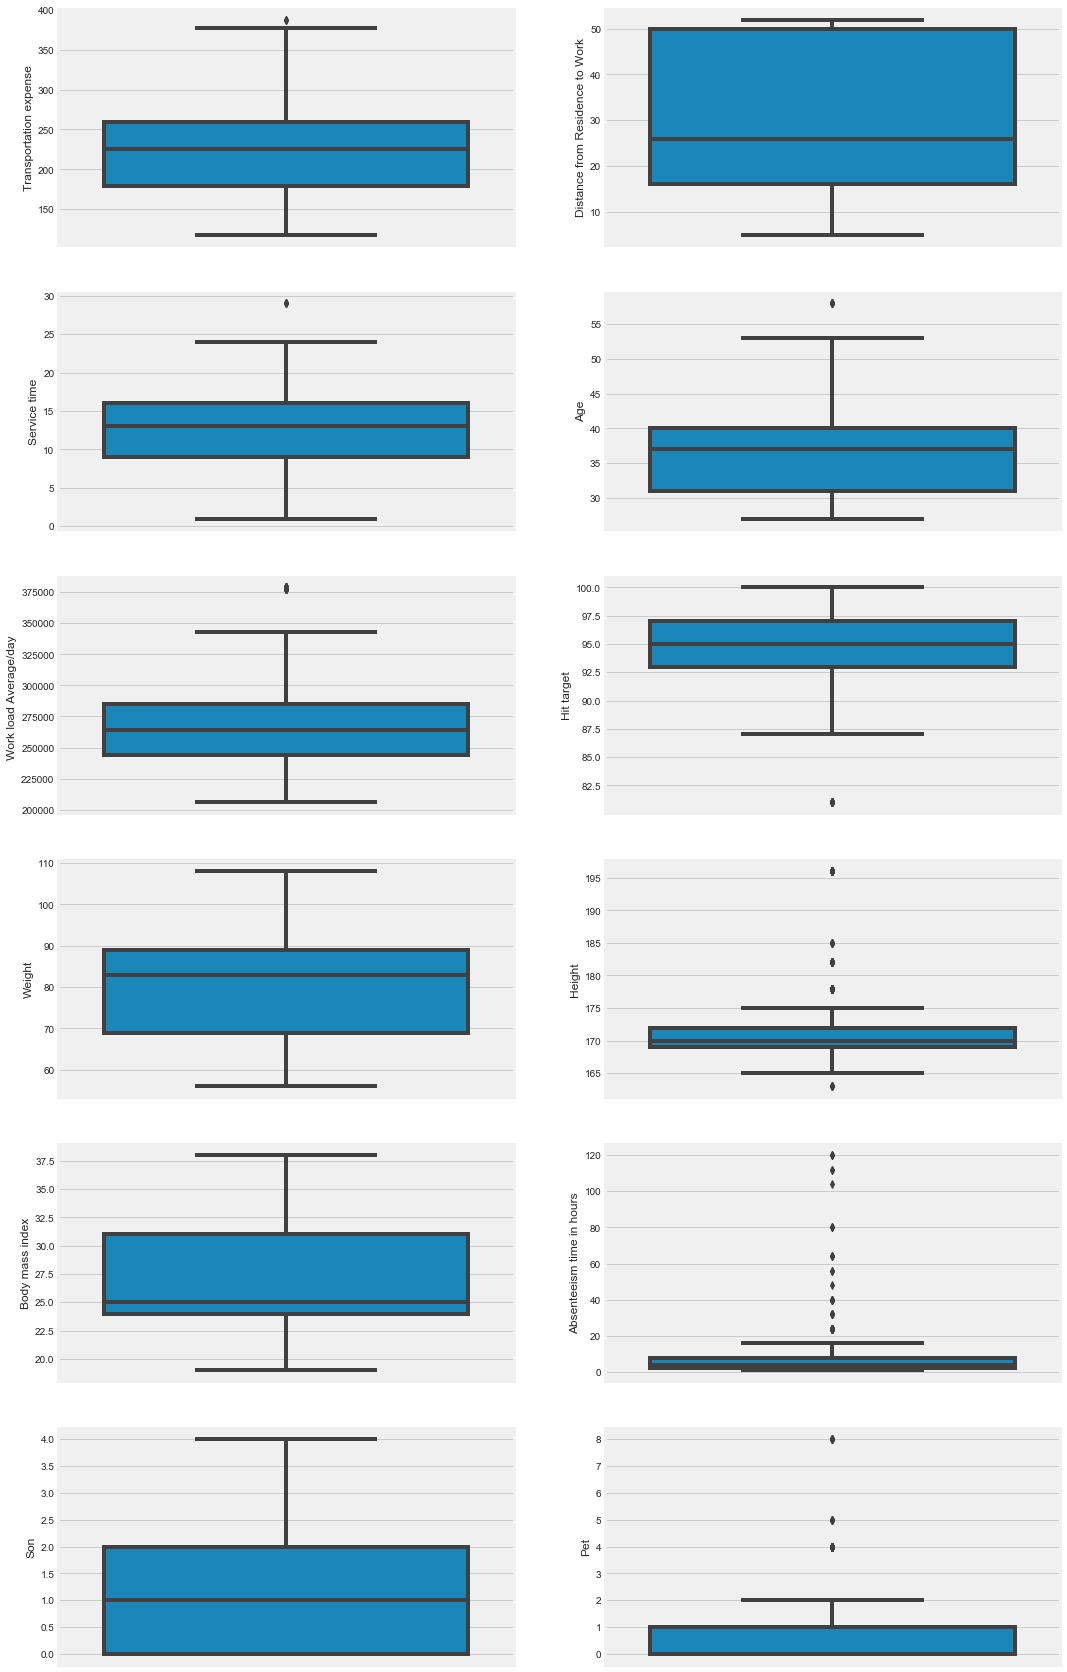

In [259]:
## Checking Outliers using Boxplot Method

fig, ax = plt.subplots(nrows = 6, ncols= 2, figsize=(16, 8))

sns.boxplot(y = 'Transportation expense', data = empdf, ax = ax[0][0])
sns.boxplot(y = 'Distance from Residence to Work', data = empdf, ax = ax[0][1])
sns.boxplot(y = "Service time", data = empdf, ax = ax[1][0])
sns.boxplot(y = 'Age', data = empdf, ax = ax[1][1])
sns.boxplot(y = 'Work load Average/day ', data = empdf, ax = ax[2][0])
sns.boxplot(y = 'Hit target', data = empdf, ax = ax[2][1])
sns.boxplot(y = 'Weight', data = empdf, ax = ax[3][0])
sns.boxplot(y = 'Height', data = empdf, ax = ax[3][1])
sns.boxplot(y = "Body mass index", data = empdf, ax = ax[4][0])
sns.boxplot(y = "Absenteeism time in hours", data = empdf, ax = ax[4][1])
sns.boxplot(y = 'Son', data = empdf, ax = ax[5][0])
sns.boxplot(y = 'Pet', data = empdf, ax = ax[5][1])

fig.subplots_adjust(top = 3)
plt.show()


#### From above plot, we see that Absenteeism, Height and other columns has outlier, so we will make it NaN value and then will impute 

In [260]:
#Check for outliers using boxplots
for i in cont_col:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(empdf[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    empdf.loc[empdf[i]< minimum,i] = np.nan
    empdf.loc[empdf[i]> maximum,i] = np.nan


for i in empdf.columns:
    impute(i)
empdf["Hit target"]=empdf["Hit target"].fillna(empdf["Hit target"].median())
#changing datatype after missing value and outlier treatment
empdf[cat_col]=empdf[cat_col].astype('category')
empdf[cont_col]=empdf[cont_col].astype('float')


## Feature Selection

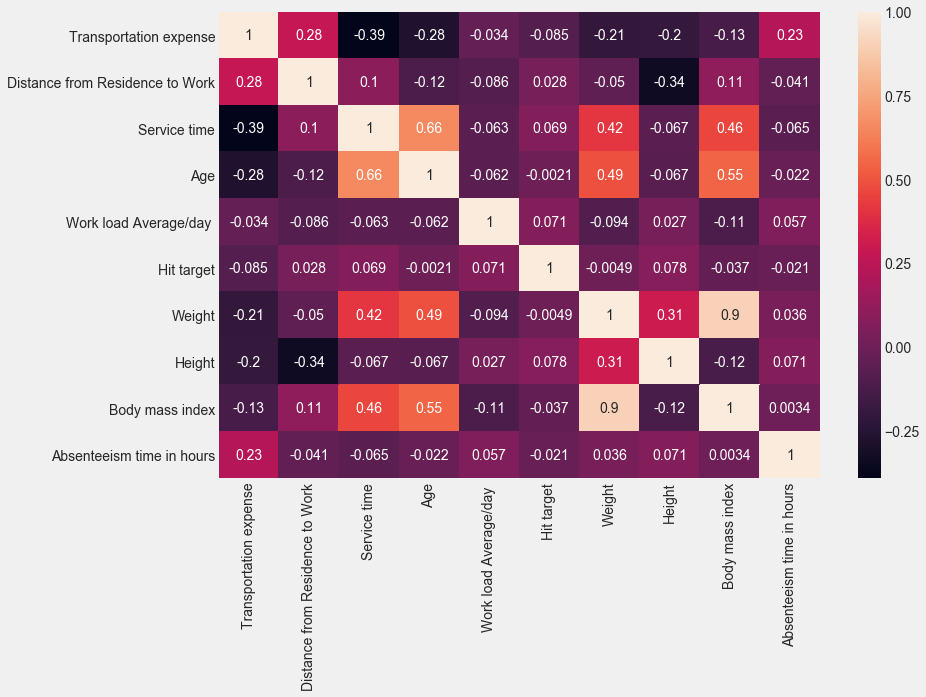

In [261]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 8))
sns.heatmap(empdf[cont_col].corr(), annot=True)

In [262]:
#from above Weight and BMI are highly correlated, hence dropping Weight here.
empdf=empdf.drop('Weight', axis=1)
cont_col.remove('Weight')

In [263]:
#checking correlation for Categorical variable
#loop for ANOVA test Since the target variable is continuous
from scipy import stats
for i in cat_col:
    f, p = stats.f_oneway(empdf[i], empdf["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 1.7673820687190984e-160
P value for variable Reason for absence is 0.0
P value for variable Month of absence is 1.8054922605707084e-13
P value for variable Day of the week is 3.5308405497716186e-16
P value for variable Seasons is 1.4315649138233654e-72
P value for variable Disciplinary failure is 1.9186172144381247e-239
P value for variable Education is 5.354341108531275e-152
P value for variable Son is 2.225624828695702e-162
P value for variable Social drinker is 5.580166331943987e-202
P value for variable Social smoker is 8.222972710061188e-238
P value for variable Pet is 1.9598103459392465e-173


## Feature Scaling

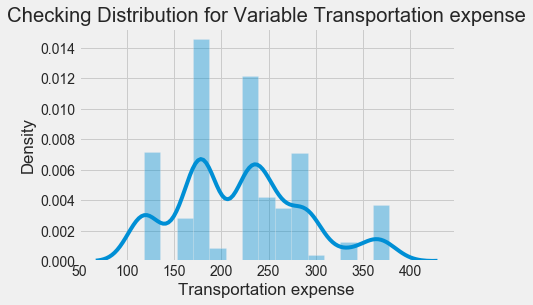

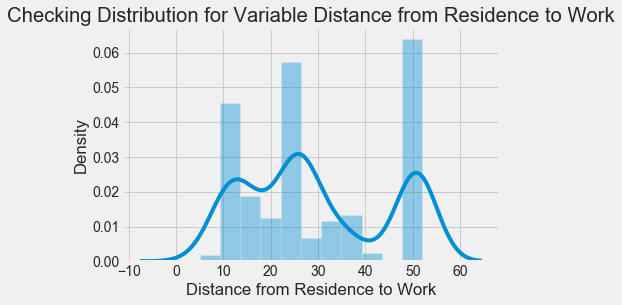

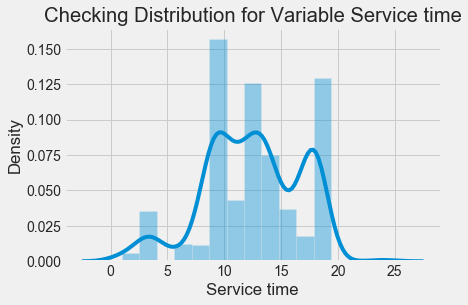

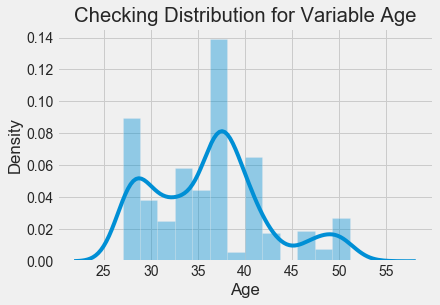

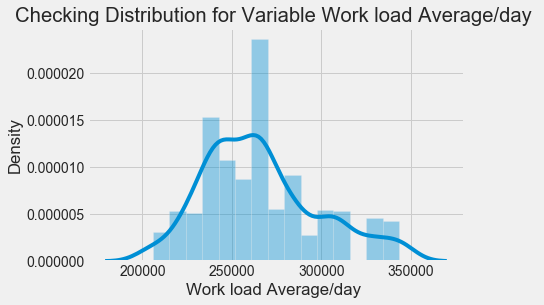

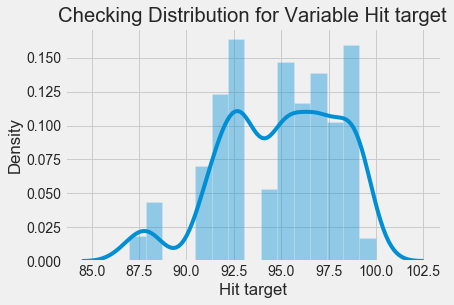

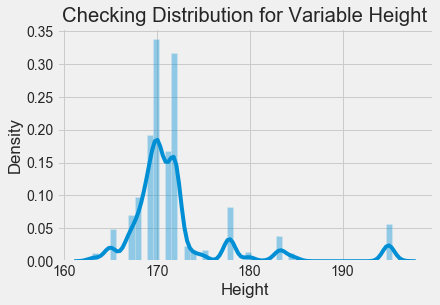

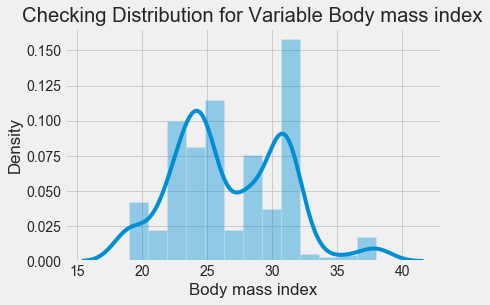

In [264]:
#Normality check
for i in cont_col:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(empdf[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [265]:
#Scaling for bringing the variable on same range
for i in cont_col:
    if i=="Absenteeism time in hours":
        continue
    empdf[i] = (empdf[i] - empdf[i].min())/(empdf[i].max()-empdf[i].min())

In [266]:
#One hot encoding for categorical variable
##################### One hot Encoding #####################
# Encoding Categorical Data
empdf = pd.get_dummies(data = empdf, columns = cat_col, drop_first=True)
print("The shape of data after dummy variable addition: ",empdf.shape)
empdf.head(2)

The shape of data after dummy variable addition:  (740, 103)


,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13,ID_14,ID_15,ID_16,ID_17,ID_18,ID_19,ID_20,ID_21,ID_22,ID_23,ID_24,ID_25,ID_26,ID_27,ID_28,ID_29,ID_30,ID_31,ID_32,ID_33,ID_34,ID_35,ID_36,Reason for absence_2.0,...,Reason for absence_16.0,Reason for absence_17.0,Reason for absence_18.0,Reason for absence_19.0,Reason for absence_21.0,Reason for absence_22.0,Reason for absence_23.0,Reason for absence_24.0,Reason for absence_25.0,Reason for absence_26.0,Reason for absence_27.0,Reason for absence_28.0,Month of absence_2.0,Month of absence_3.0,Month of absence_4.0,Month of absence_5.0,Month of absence_6.0,Month of absence_7.0,Month of absence_8.0,Month of absence_9.0,Month of absence_10.0,Month of absence_11.0,Month of absence_12.0,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,Seasons_3,Seasons_4,Disciplinary failure_1.0,Education_2.0,Education_3.0,Education_4.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0,Social drinker_1.0,Social smoker_1.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.272727,0.578709,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.448490,0.631319,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [267]:
corr=empdf.corr()
test=[]
for i in corr.columns:
    for j in corr.columns:
        if corr.loc[i,j] > 0.80:
            if i != j:
                print(i, "+", j,"=",corr.loc[i,j])
                test.append(i)
empdf=empdf.drop(test, axis=1)
print("Highly Correlated variables has been removed")

ID_2 + Pet_5.0 = 1.0
ID_10 + Pet_4.0 = 0.8611736826748876
ID_12 + Pet_8.0 = 0.9347760563791788
ID_13 + Son_3.0 = 1.0
ID_20 + Son_4.0 = 0.987316526394564
ID_28 + Pet_2.0 = 0.8762541213258696
ID_29 + Education_4.0 = 0.8938193572966863
Education_4.0 + ID_29 = 0.8938193572966863
Son_3.0 + ID_13 = 1.0
Son_4.0 + ID_20 = 0.987316526394564
Pet_2.0 + ID_28 = 0.8762541213258696
Pet_4.0 + ID_10 = 0.8611736826748876
Pet_5.0 + ID_2 = 1.0
Pet_8.0 + ID_12 = 0.9347760563791788
Highly Correlated variables has been removed


In [268]:
#Train and Test splittting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( empdf.iloc[:, empdf.columns != 'Absenteeism time in hours'], empdf.loc[:, 'Absenteeism time in hours'], test_size = 0.20, random_state = 1)

################ Evaluation Metrics ##############
## Calculate MAPE 
def MAPE(y_act, y_pred):
    mape = np.mean(np.abs((y_act - y_pred)/ y_act))*100
    return mape

## Calculate RMSE
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    rmse=np.sqrt(mse)
    return rmse


# #Model Building

In [269]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression().fit(X_train, y_train)
LR_pred=lrmodel.predict(X_test)

#Get Linear Regression Equation along with Co-efficients
emp_linear_coeff = pd.DataFrame(zip(empdf.columns, lrmodel.coef_.tolist()), columns=['Names', 'Coefficients'])
print(emp_linear_coeff.head())

print()

#Create data frame for actual and predicted values
linear_eval = pd.DataFrame({'predicted':LR_pred, 'actual': y_test})
print(linear_eval.head())

print()
mName=[]
rmse=[]
r2=[]

from sklearn.metrics import r2_score
#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, LR_pred)))
print("R^2 : "+str(r2_score(y_test, LR_pred)))
rmse.append(RMSE(y_test, LR_pred))
r2.append(r2_score(y_test, LR_pred))
mName.append("Linear Regression")

                             Names  Coefficients
0           Transportation expense      6.214456
1  Distance from Residence to Work      1.143282
2                     Service time      3.565193
3                              Age     -1.957034
4           Work load Average/day       0.209882

     predicted  actual
681   4.859762     8.0
257   5.475150     2.0
527   7.309362     8.0
637   6.292395     8.0
429   2.911079     4.0

RMSE : 3.295531226497698
R^2 : 0.07394402561526459


In [270]:
#Random Forest Regressor##########################

# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Comparison Dataframe for Random Forest
randomforest_eval = pd.DataFrame({'predicted':rf_predictions, 'actual': y_test})
print(randomforest_eval.head())

print()
#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, rf_predictions)))
print("R^2 : "+str(r2_score(y_test, rf_predictions)))
rmse.append(RMSE(y_test, rf_predictions))
r2.append(r2_score(y_test, rf_predictions))
mName.append("RandomForest Regression")

     predicted  actual
681   5.900167     8.0
257   4.091333     2.0
527   6.808500     8.0
637   3.978667     8.0
429   3.962633     4.0

RMSE : 2.7992033127597695
R^2 : 0.3318787844561586


In [271]:
df_xgboost = empdf
for i in range(0, df_xgboost.shape[1]):
        df_xgboost.iloc[:,i] = df_xgboost.iloc[:,i].astype('float')
        
## Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( df_xgboost.iloc[:, df_xgboost.columns != 'Absenteeism time in hours'], df_xgboost.loc[:, 'Absenteeism time in hours'], test_size = 0.20, random_state = 1)

In [272]:
# Importing xgboost library
import xgboost as xgb

# Creating Model with parameters
xgb = xgb.XGBRegressor(n_estimators=300, booster='gbtree', learning_rate=0.01, gamma=1, subsample=0.80,
                           colsample_bytree=1, max_depth=5, nthread=3)

# Train the model with data
xgb.fit(X_train_1,y_train_1)

# Test cases
xgb_predictions = xgb.predict(X_test_1)

#Comparison Dataframe for XG Boost
xgboost_eval = pd.DataFrame({'predicted':xgb_predictions, 'actual': y_test_1})

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test_1, xgb_predictions)))
print("R^2 : "+str(r2_score(y_test_1, xgb_predictions)))

rmse.append(RMSE(y_test_1, xgb_predictions))
r2.append(r2_score(y_test_1, xgb_predictions))
mName.append("XGBoost Regression")

[18:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 2.6767648718945547
R^2 : 0.3890483751040641


In [273]:
#Gradient Boosting ####################

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
# Calulating RMSE
print('Root Mean Squared Error of test:'+str(RMSE(y_test,pred_test)))
print("R^2 Score for test = "+str(r2_score(y_test,pred_test)))

rmse.append(RMSE(y_test,pred_test))
r2.append(r2_score(y_test,pred_test))
mName.append("GradientBoosting Regression")

Root Mean Squared Error of test:2.6771795076854503
R^2 Score for test = 0.38885908538878045


In [274]:
empdf.head(3)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_11,ID_14,ID_15,ID_16,ID_17,ID_18,ID_19,ID_21,ID_22,ID_23,ID_24,ID_25,ID_26,ID_27,ID_30,ID_31,ID_32,ID_33,ID_34,ID_35,ID_36,Reason for absence_2.0,Reason for absence_3.0,Reason for absence_4.0,Reason for absence_5.0,Reason for absence_6.0,Reason for absence_7.0,Reason for absence_8.0,Reason for absence_9.0,Reason for absence_10.0,Reason for absence_11.0,Reason for absence_12.0,Reason for absence_13.0,Reason for absence_14.0,Reason for absence_15.0,Reason for absence_16.0,Reason for absence_17.0,Reason for absence_18.0,Reason for absence_19.0,Reason for absence_21.0,Reason for absence_22.0,Reason for absence_23.0,Reason for absence_24.0,Reason for absence_25.0,Reason for absence_26.0,Reason for absence_27.0,Reason for absence_28.0,Month of absence_2.0,Month of absence_3.0,Month of absence_4.0,Month of absence_5.0,Month of absence_6.0,Month of absence_7.0,Month of absence_8.0,Month of absence_9.0,Month of absence_10.0,Month of absence_11.0,Month of absence_12.0,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,Seasons_3,Seasons_4,Disciplinary failure_1.0,Education_2.0,Education_3.0,Son_1.0,Son_2.0,Social drinker_1.0,Social smoker_1.0,Pet_1.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.272727,0.578709,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.448490,0.631319,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.212121,0.631319,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##Dimensionality reduction by PCA

In [275]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
#target=empdf["Absenteeism time in hours"]
#empdf_pca=pca.fit_transform(empdf.loc[:,empdf.columns!="Absenteeism time in hours"])

X_train_s= pca.fit_transform(X_train)
X_test_s = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.08647536, 0.07705729, 0.06744225, 0.06088425, 0.04952436,
       0.0457704 , 0.04411012, 0.03706109, 0.03439265, 0.03238474,
       0.0309383 , 0.02726486, 0.02421089, 0.02333411, 0.02180078,
       0.02004265, 0.01824782, 0.01734819, 0.01595126, 0.01531213,
       0.01457465, 0.01437321, 0.01404211, 0.01303301, 0.01231537,
       0.01191938, 0.01075381, 0.01050902, 0.01004985, 0.00907377,
       0.00873275, 0.00799217, 0.00764044, 0.00733985, 0.00686304,
       0.00654461, 0.00575279, 0.00539661, 0.00512958, 0.00489715,
       0.00447634, 0.00431149, 0.00392762, 0.00371509])

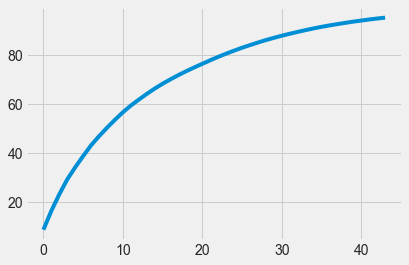

In [276]:
var1 = np.cumsum(np.round(explained_variance, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [277]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train_s,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test_s)

#Comparison Dataframe for Random Forest
randomforest_eval = pd.DataFrame({'predicted':rf_predictions, 'actual': y_test})
print(randomforest_eval.head())

print()

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, rf_predictions)))
print("R^2 : "+str(r2_score(y_test, rf_predictions)))
rmse.append(RMSE(y_test, rf_predictions))
r2.append(r2_score(y_test, rf_predictions))
mName.append("RandomForest Reg._with_PCA")

     predicted  actual
681   4.325500     8.0
257   5.023667     2.0
527   4.352833     8.0
637   4.897000     8.0
429   2.727200     4.0

RMSE : 2.9207547295914384
R^2 : 0.2725945461640451


In [278]:
#Train the model
linear_regressor = LinearRegression().fit(X_train_s , y_train)

#Predict for test cases
linear_predictions = linear_regressor.predict(X_test_s)

#Get Linear Regression Equation along with Co-efficients
#df_linear_coeff = pd.DataFrame(zip(empdf.columns, linear_regressor.coef_.tolist()), columns=['Names', 'Coefficients'])
#print(df_linear_coeff.head())

print()

#Create data frame for actual and predicted values
linear_eval = pd.DataFrame({'predicted':linear_predictions, 'actual': y_test})
print(linear_eval.head())

print()

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, linear_predictions)))
print("R^2 : "+str(r2_score(y_test,linear_predictions )))
rmse.append(RMSE(y_test, linear_predictions))
r2.append(r2_score(y_test, linear_predictions))
mName.append("Linear Regression_with_PCA")


     predicted  actual
681   5.269795     8.0
257   5.806475     2.0
527   3.729077     8.0
637   7.042404     8.0
429   2.603427     4.0

RMSE : 2.7417685166650148
R^2 : 0.3590148826086532


In [279]:
#Gradient Boosting ####################

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train_s, y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train_s)
# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test_s)
# Calulating RMSE
print('Root Mean Squared Error of test:'+str(RMSE(y_test,pred_test)))
print("R^2 Score for test = "+str(r2_score(y_test,pred_test)))

rmse.append(RMSE(y_test,pred_test))
r2.append(r2_score(y_test,pred_test))
mName.append("GradientBoosting Reg._with_PCA")

Root Mean Squared Error of test:2.9249443654610356
R^2 Score for test = 0.27050621624161186


In [280]:
#df_xgboost = empdf

y_train_1=y_train.astype('float')
y_test_1=y_test.astype('float')

X_train_1=X_train_s.astype('float')
X_test_1=X_test_s.astype('float')


## Divide the dataset into train and test
#from sklearn.model_selection import train_test_split
#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( df_xgboost.iloc[:, df_xgboost.columns != 'Absenteeism time in hours'], df_xgboost.loc[:, 'Absenteeism time in hours'], test_size = 0.20, random_state = 1)

# Importing xgboost library
import xgboost as xgb

# Creating Model with parameters
xgb = xgb.XGBRegressor(n_estimators=300, booster='gbtree', learning_rate=0.01, gamma=1, subsample=0.80,
                           colsample_bytree=1, max_depth=5, nthread=3)

# Train the model with data
xgb.fit(X_train_1,y_train_1)

# Test cases
xgb_predictions = xgb.predict(X_test_1)

#Comparison Dataframe for XG Boost
xgboost_eval = pd.DataFrame({'predicted':xgb_predictions, 'actual': y_test_1})

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test_1, xgb_predictions)))
print("R^2 : "+str(r2_score(y_test_1, xgb_predictions)))

rmse.append(RMSE(y_test_1, xgb_predictions))
r2.append(r2_score(y_test_1, xgb_predictions))
mName.append("XGBoost Regression_with_PCA")

[18:57:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 2.8412458099045517
R^2 : 0.3116584392707096


In [281]:
modelSum=pd.DataFrame({"Model Name":mName, "R-Square":r2, "RMSE Value":rmse})
modelSum

,Model Name,R-Square,RMSE Value
0,Linear Regression,0.073944,3.295531
1,RandomForest Regression,0.331879,2.799203
2,XGBoost Regression,0.389048,2.676765
3,GradientBoosting Regression,0.388859,2.677180
4,RandomForest Reg._with_PCA,0.272595,2.920755
5,Linear Regression_with_PCA,0.359015,2.741769
6,GradientBoosting Reg._with_PCA,0.270506,2.924944
7,XGBoost Regression_with_PCA,0.311658,2.841246


##### From the above analysis, we found that Gradient Boost and XG Boost regression are giving the higher R-Square value and lower RMSE value, which concludes these model as better model than the others.
##### Increasing the number of observation can increase the accuracy of the model with better prediction of employee absenteeism